# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БПИ-2303 Гавриленко Владислав
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

Граф по вашему запросу: {'A': {}, 'B': {'D': 9}, 'C': {'B': 1, 'E': 5}, 'D': {'C': 1}, 'E': {'D': 2, 'A': 1}, 'F': {'C': 7, 'D': 7, 'B': 5, 'A': 7}}
Кратчайший путь: ['D'] (длина: inf)
Время выполнения: 0.000019 секунд


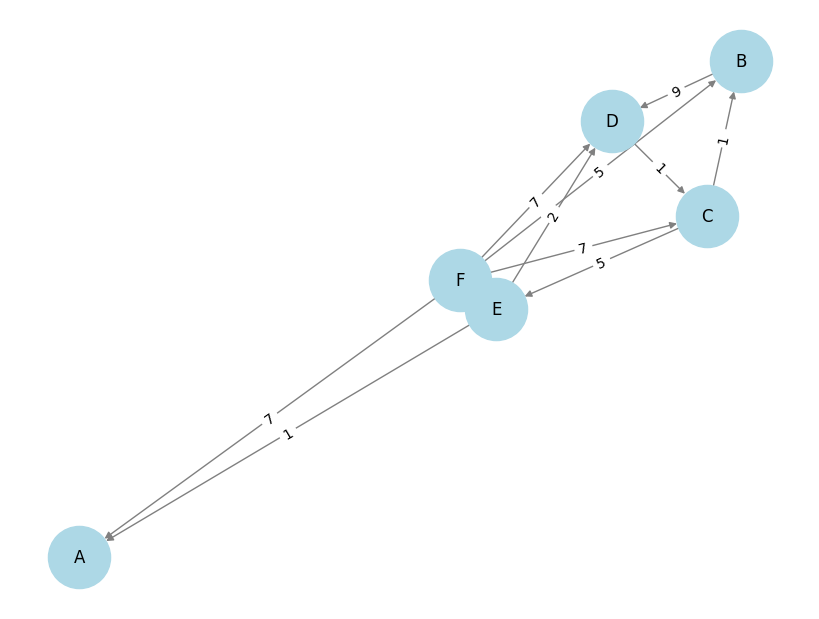


Анализ временной сложности:
Размер графа | Время выполнения (сек)
5            | 0.000014
10           | 0.000016
20           | 0.000016
50           | 0.000016
100          | 0.000076


In [ ]:
%pip install networkx
import random
import heapq
import time
import networkx as nx
import matplotlib.pyplot as plt

def generate_graph(nodes=5, edges=7, max_weight=10):
    graph = {chr(65 + i): {} for i in range(nodes)}  
    all_nodes = list(graph.keys())
    
    for _ in range(edges):
        u, v = random.sample(all_nodes, 2)
        weight = random.randint(1, max_weight)
        graph[u][v] = weight 
    
    return graph

def dijkstra(graph, start, end):
    queue = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}
    
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        
        if current_node == end:
            break
        
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))
    
    path, node = [], end
    while node is not None:
        path.insert(0, node)
        node = previous_nodes[node]
    
    return path, distances[end]

def draw_graph(graph, path=None):
    G = nx.DiGraph()
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(G)
    edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges}
    
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)
    
    plt.show()

graph = generate_graph(6, 10)  
print("Граф по вашему запросу:", graph)

start, end = 'A', 'D'  
if start in graph and end in graph:
    start_time = time.time()
    path, distance = dijkstra(graph, start, end)
    end_time = time.time()
    execution_time = end_time - start_time
    
    print(f"Кратчайший путь: {path} (длина: {distance})")
    print(f"Время выполнения: {execution_time:.6f} секунд")
    draw_graph(graph, path)
else:
    print("Ошибка (одна из вершин отсутствует в графе)")

sizes = [5, 10, 20, 50, 100]
results = []
for size in sizes:
    graph = generate_graph(size, size * 2)  
    start, end = 'A', chr(65 + size - 1)
    
    if start in graph and end in graph:
        start_time = time.time()
        dijkstra(graph, start, end)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append((size, execution_time))

print("\nАнализ временной сложности:")
print("Размер графа | Время выполнения (сек)")
for size, exec_time in results:
    print(f"{size:<12} | {exec_time:.6f}")


### Вывод

В ходе выполнения лабораторной работы был реализован алгоритм поиска кротчайшего расстояния между двумя вершинами ориентированного взвешанного графа. Среди алгоритмов был выбрал алгоритм Дейкстра. Также была выполнена визуализация через библиотеку matplotlib и проведен анализ временной сложности в зависимости от размера графа.